In [46]:
import sys
import os

# 1. Get the current directory (notebooks/)
current_dir = os.getcwd()

# 2. Go up one level (cifar100-transfer-learning/)
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# 3. Add the project root to the system path
if project_root not in sys.path:
    sys.path.append(project_root)

print(f"Project root added to path: {project_root}")

Project root added to path: c:\Users\ADMIN\Desktop\Deep_Learning_Dev\cifar100_project


In [37]:
import torch
import torchvision
import torchvision.transforms as T

# 1. Define the transformation
# Convert the PIL image to a PyTorch Tensor
# Normalize the tensors using the mean and standard deviation specific to CIFAR datasets

transform = T.Compose(
    [
        T.ToTensor(),
        T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

# Define the directory where the dataset will be stored
data_root = '../data'

In [38]:
# Load the training dataset
train_dataset = torchvision.datasets.CIFAR100(
    root = data_root,
    train = True,
    download = True,
    transform = transform
)
# Optional: Print the size of the training dataset
print(f"Size of Training Dataset: {len(train_dataset)} samples")
# Size of Training Dataset: 50000 samples

Files already downloaded and verified
Size of Training Dataset: 50000 samples


In [39]:
# Load the testing dataset
test_dataset = torchvision.datasets.CIFAR100(
    root = data_root,
    train = False,
    download = True,
    transform = transform
)
# Optional: Print the size of the testing dataset
print(f"Size of Testing Dataset: {len(test_dataset)} samples")
# Size of Testing Dataset: 10000 samples

Files already downloaded and verified
Size of Testing Dataset: 10000 samples


In [40]:
image_tensor, label = train_dataset[0]
image_tensor.shape

torch.Size([3, 32, 32])

In [41]:
class_name = train_dataset.classes[label]
class_name

'cattle'

In [42]:
train_dataset.classes[:5]

['apple', 'aquarium_fish', 'baby', 'bear', 'beaver']

In [43]:
from torch.utils.data import DataLoader
#Create DataLoaders
train_batch_size = 64
test_batch_size = 128
train_loader = DataLoader(
    train_dataset,
    batch_size=train_batch_size,
    shuffle=True,
    num_workers=2
)

test_loader = DataLoader(
    test_dataset,
    batch_size=test_batch_size,
    shuffle=False,
    num_workers=2
)
print("\nDataloaders created and ready for use.")



Dataloaders created and ready for use.


In [44]:
# Get one batch from the training loader
# iter() makes the loader iterable, and next() pulls the first element
dataiter = iter(train_loader)
train_images, train_labels = next(dataiter)

print(f"\n--- Training Batch Inspection (batch_size={train_batch_size}) ---")
print(f"Shape of images tensor: {train_images.shape}")
print(f"Shape of labels tensor: {train_labels.shape}")
print(f"Data type of labels: {train_labels.dtype}")

# Get one batch from the testing loader
dataiter = iter(test_loader)
test_images, test_labels = next(dataiter)

print(f"\n--- Testing Batch Inspection (batch_size={test_batch_size}) ---")
print(f"Shape of images tensor: {test_images.shape}")
print(f"Shape of labels tensor: {test_labels.shape}")


--- Training Batch Inspection (batch_size=64) ---
Shape of images tensor: torch.Size([64, 3, 32, 32])
Shape of labels tensor: torch.Size([64])
Data type of labels: torch.int64

--- Testing Batch Inspection (batch_size=128) ---
Shape of images tensor: torch.Size([128, 3, 32, 32])
Shape of labels tensor: torch.Size([128])


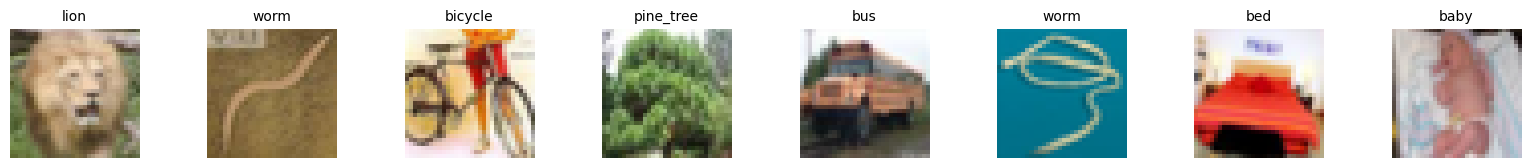

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# 1. Grab the first batch of images and labels
# Assuming train_loader and train_dataset are already defined and loaded
dataiter = iter(train_loader)
images, labels = next(dataiter)

# --- Define Denormalization Function ---
# We used transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
# To reverse it, we multiply by std dev and add the mean: (0.5 * input) + 0.5
def denormalize(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    # Pytorch tensor shape is (C, H, W). Matplotlib needs (H, W, C).
    return np.transpose(npimg, (1, 2, 0))

# 2. Plot the first 8 images
fig, axes = plt.subplots(1, 8, figsize=(16, 2))
fig.tight_layout(pad=1.5) # Add padding between subplots

for i in range(8):
    image = images[i]
    label = labels[i].item() # Get the integer label
    class_name = train_dataset.classes[label] # Map to the class name
    
    ax = axes[i]
    ax.imshow(denormalize(image))
    ax.set_title(class_name, fontsize=10)
    ax.axis('off') # Hide axes ticks and labels

plt.show()

In [48]:
# Import the SimpleCNN class using the package structure
# src/models/cnn_model.py  ->  src.models.cnn_model
from src.models.baseline_cnn import CIFAR100BaselineCNN 

# You can now instantiate and use your model
net = CIFAR100BaselineCNN(num_classes=100)
print(net)

CIFAR100BaselineCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=2048, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=512, out_features=100, bias=True)
  )
)


In [49]:
import torch

# --- Assuming 'net' is your instantiated SimpleCNN model ---

# Define the input batch size (4) and input shape (3, 32, 32)
dummy_batch_size = 4
# Shape: (Batch Size, Channels, Height, Width)
dummy_input_shape = (dummy_batch_size, 3, 32, 32)

# 1. Create a fake batch of random data
# torch.randn generates a tensor with random values from a standard normal distribution.
fake_input = torch.randn(dummy_input_shape)

# 2. Pass the fake batch through the instantiated model
# The model will run its 'forward' method.
output = net(fake_input)

# 3. Print and verify the shapes
print(f"Shape of the fake input batch: {fake_input.shape}")
print(f"Shape of the final output: {output.shape}")

Shape of the fake input batch: torch.Size([4, 3, 32, 32])
Shape of the final output: torch.Size([4, 100])


In [55]:
fake_input[0][0][0]

tensor([-2.0492,  1.0031,  0.0752, -1.0357,  0.4364, -1.6117, -0.1529, -0.2172,
         0.0387, -1.0552,  0.1094, -0.3189,  0.5743, -1.6756, -1.1552, -0.5734,
        -0.7866,  1.3497,  1.3336,  0.4877, -0.6899,  1.3533,  0.7997,  1.1474,
        -0.8465,  1.5666, -0.1242, -1.1517, -0.0715, -1.9520, -2.4684, -1.0538])

In [59]:
output[0]

tensor([ 0.0956, -0.0309, -0.0043, -0.0658, -0.0244, -0.0390,  0.0234, -0.0761,
         0.0024,  0.1042,  0.0099,  0.0297,  0.1086, -0.0168, -0.0875,  0.0137,
         0.0602,  0.0283,  0.0018,  0.0550, -0.0283, -0.0937,  0.1597,  0.0958,
         0.0784, -0.0349, -0.0105, -0.0336,  0.0164,  0.0627,  0.0049,  0.0063,
        -0.0440, -0.0048,  0.0432,  0.0287,  0.0145, -0.0290, -0.0092,  0.0067,
         0.0084, -0.1447, -0.0363, -0.0725,  0.0228, -0.0457, -0.0689,  0.0251,
        -0.0058,  0.0541,  0.0426,  0.0713, -0.0743,  0.0623, -0.0059,  0.0513,
         0.0251, -0.0533, -0.0894,  0.0533, -0.0184, -0.0405, -0.0168, -0.0310,
         0.0460,  0.0240, -0.0950, -0.0607, -0.0055, -0.0428, -0.0310,  0.0571,
        -0.0242, -0.1081, -0.0031,  0.0178,  0.0607,  0.0366,  0.0395, -0.0567,
         0.0209,  0.0020,  0.0234,  0.0750,  0.0278, -0.0081,  0.0597,  0.0509,
        -0.0539, -0.0425,  0.0829, -0.0087,  0.0540,  0.0620,  0.0024,  0.0884,
         0.0192, -0.1139, -0.0492, -0.02

In [60]:
import torch.nn as nn
import torch.optim as optim

# Loss function
creterion = nn.CrossEntropyLoss()

# Optimizer (SGD with momentum for stability and fast convergence)
learning_rate = 0.001
momentum = 0.9
optimizer = optim.SGD(net.parameters() , lr=learning_rate , momentum=momentum)

print("Loss function (CrossEntropyLoss) and Optimizer (SGD with momentum) defined.")

Loss function (CrossEntropyLoss) and Optimizer (SGD with momentum) defined.


In [61]:
# Train for a small number of epochs (5)
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.8

    #iterate through the training batches
    for i , data in enumerate(train_loader , 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs ,  labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass: compute predicted outputs by passing inputs to the model
        outputs = net(inputs)

        # Calculate loss
        loss = creterion(outputs, labels)
        
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()

        # Optimizer step: update model parameters
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0
print('Finished Training')



[1,   100] loss: 4.614
[1,   200] loss: 4.605
[1,   300] loss: 4.604
[1,   400] loss: 4.603
[1,   500] loss: 4.602
[1,   600] loss: 4.602
[1,   700] loss: 4.601
[2,   100] loss: 4.606
[2,   200] loss: 4.596
[2,   300] loss: 4.593
[2,   400] loss: 4.589
[2,   500] loss: 4.583
[2,   600] loss: 4.574
[2,   700] loss: 4.567
[3,   100] loss: 4.532
[3,   200] loss: 4.495
[3,   300] loss: 4.469
[3,   400] loss: 4.427
[3,   500] loss: 4.385
[3,   600] loss: 4.339
[3,   700] loss: 4.295
[4,   100] loss: 4.208
[4,   200] loss: 4.153
[4,   300] loss: 4.138
[4,   400] loss: 4.082
[4,   500] loss: 4.067
[4,   600] loss: 4.017
[4,   700] loss: 4.033
[5,   100] loss: 3.971
[5,   200] loss: 3.946
[5,   300] loss: 3.950
[5,   400] loss: 3.932
[5,   500] loss: 3.919
[5,   600] loss: 3.901
[5,   700] loss: 3.891
Finished Training


In [62]:
def evaluate_model_accuracy(model, data_loader):
    # Set the model to evaluation mode (disables dropout, batch norm updates, etc.)
    model.eval() 
    
    correct = 0
    total = 0
    
    # Disable gradient computation during evaluation
    with torch.no_grad():
        for data in data_loader:
            images, labels = data
            
            # Forward pass
            outputs = model(images)
            
            # Get the predicted class (index of the highest score)
            # torch.max returns (values, indices)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Run the evaluation function
test_accuracy = evaluate_model_accuracy(net, test_loader)
print(f'Accuracy of the network on the 10000 test images: {test_accuracy:.2f} %')

Accuracy of the network on the 10000 test images: 13.27 %


In [63]:
model_save_path = './baseline_cifar100.pth'

# Save only the state dictionary (the learned parameters)
torch.save(net.state_dict(), model_save_path)

print(f"Model saved successfully to {model_save_path}")

# --- Example of how to load the model later ---
# new_net = SimpleCNN(num_classes=100)
# new_net.load_state_dict(torch.load(model_save_path))
# new_net.eval() 
# print("Model successfully loaded and set to evaluation mode.")

Model saved successfully to ./baseline_cifar100.pth
